In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [4]:
images, targets = mnist['data'], mnist['target']

In [5]:
test_image = images[244].reshape((28,28))

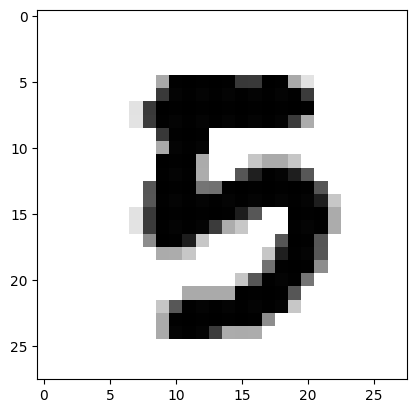

In [6]:
plt.imshow(test_image, cmap= 'binary')

In [6]:
X_train, X_test, y_train, y_test = images[:60000], images[60000:], targets[:60000], targets[60000:]

In [8]:
# binary classifier - 4 and not 4

In [7]:
new_targets = (y_train == '4')

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
# an SGD classifier trains a linear classifier like SVM or Logistic regression using an SGD optimization method
# The model it fits can be controlled with the loss parameter. the default loss is 'hinge' which fits an SVM

# for each instance, the classifier computes a score based on a decision function. If that score is greater than a threshold, it assigns the
# instance to the positive class; otherwise it assigns it to the negative class.

# sklearn does not allow you to directly set the threshold by can acess the score used to make predictions using the decision_function() method
# default theshold value is 0
sgd_clf = SGDClassifier(loss = 'hinge', random_state= 34)

In [10]:
sgd_clf.fit(X_train, new_targets)

SGDClassifier(random_state=34)

In [52]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(sgd_clf, X_train, new_targets, scoring = 'accuracy', cv = 3)

array([0.97855, 0.97865, 0.9782 ])

In [71]:
from sklearn.dummy import DummyClassifier

In [72]:
# This classifier serves as a simple baseline to compare against other more complex classifiers.
dummy_clf = DummyClassifier(strategy= 'most_frequent')

In [73]:
dummy_clf.fit(X_train, new_targets)

DummyClassifier(strategy='most_frequent')

In [74]:
cross_val_score(dummy_clf, X_train, new_targets, cv = 3, scoring= 'accuracy')

array([0.90265, 0.90265, 0.9026 ])

In [16]:
from sklearn.model_selection import cross_val_predict

In [17]:
# Passing these predictions into an evaluation metric directly may not be a valid way to measure generalization performance??
# The purpose of cross_val_predict is to generate out-of-sample predictions for each data point in the dataset.
# Out-of-sample means the model makes predictions on data that it never saw during training
# provides predictions for all data points by stitching together predictions from different folds into a single array. 
# There is no fold-by-fold aggregation, so this bypasses the fold-specific evaluation.

# like the cross_val_score() function, cross_val_predict() performs k-fold cross-validation, but instead of returning the evaluation scores, 
# it returns the predictions made on each test fold

predictions = cross_val_predict(sgd_clf, X_train, new_targets, cv = 3)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
# each column represents the predicted class
confusion_matrix(new_targets, predictions)

array([[53438,   720],
       [  572,  5270]])

In [20]:
# 720 - False positives (type-1 errors)
# 572 - True Negatives (type-2 errors)

In [31]:
# precision
# out of the portion of data points that the model predicted are true, how many are actually true
# from the confusion matrix above it is
from sklearn.metrics import precision_score

precision = precision_score(new_targets, predictions)
print(f'{precision:.3f}')

0.880


In [30]:
# recall: outof all the positive instances, how many were detected by the model as positive
# from the confusion matrix above it is
from sklearn.metrics import recall_score

recall = recall_score(new_targets, predictions)
print(f'{recall:.3f}')

0.902


In [32]:
# compute f1-score which is harmonic mean of precision and recall
from sklearn.metrics import f1_score

f1 = f1_score(new_targets, predictions)
print(f'{f1:.3f}')

0.891


In [36]:
# the decision_function returns a confidence score which measures the magnitude/ signed distance of the sample from the hyperplane(decision boundary) of the classifier which is the
# confidence score of the sample. The higher the confidence score, the farther away the point is from the hyperplane the more
# confident is the model in its the classification.

sgd_clf.decision_function(X_test)

array([-19571.90705731, -48511.29898605,  -7015.26344486, ...,
         2612.69557458, -12731.8189141 , -23245.32580778])

In [38]:
# deicsion_function is the output of the classifier a step before applying the threshold to decide the class
decision_function_ops = sgd_clf.decision_function(X_test)

In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# if you want to choose a custom threshold, a good way is to use grid-search cross validation or to plot a precision_recall_curve
decision_scores = cross_val_predict(sgd_clf, X_train, new_targets, cv = 3, method = 'decision_function')

In [52]:
decision_scores

array([-46516.72597202, -38589.41034932,   8065.25551082, ...,
       -20466.44958011, -11610.73261052, -23095.07273539])

In [53]:
from sklearn.metrics import precision_recall_curve

# computes precision and recall for different values of threshold
precisions, recalls, thresholds = precision_recall_curve(new_targets, decision_scores)

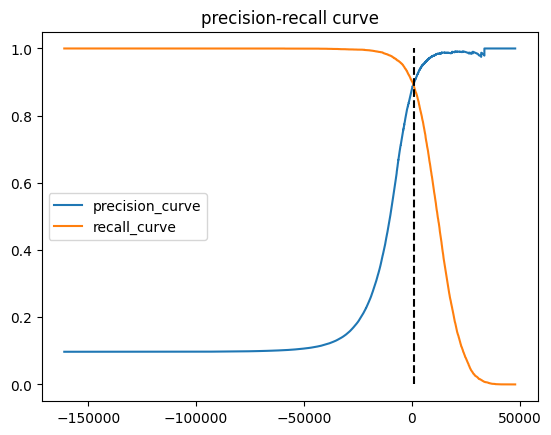

In [106]:
plt.plot(thresholds, precisions[:-1], label = 'precision_curve')
plt.plot(thresholds, recalls[:-1], label = 'recall_curve')
plt.vlines(x = 1061, ymin = 0, ymax=1, linestyles= '--', colors= 'black')
plt.title('precision-recall curve')
plt.legend()
plt.show()

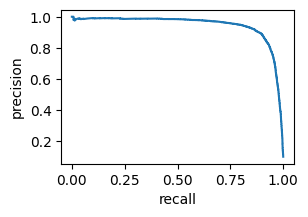

In [107]:
# as you move from left to right on x-axis, you are moving towards a lower threshold
plt.figure(figsize = (3,2), dpi = 100)
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [86]:
# recall vs precision plot and (recall, precision) vs thresholds are tow plotting techniques to find a good threshold

In [87]:
arr.argmax()

np.int64(3)

In [94]:
# if you have a target precision to reach ask what should the recall be!
desired_threshold_idx = (precisions >= 0.90).argmax()

In [95]:
desired_threshold_idx

np.int64(54264)

In [96]:
desired_threshold = thresholds[desired_threshold_idx]

In [100]:
desired_threshold

np.float64(1061.797120503065)

In [97]:
# the `predict` method of a classifier uses a threshold of 0.5 by default for probabilistic models like Logistic Regression and SVM with probability estimates
# If `predict_proba` is available (e.g., in logistic regression), the model assigns probabilities to each class. The default threshold is **0.5**, meaning:  
#   - If probability ≥ 0.5, it predicts positive 
#   - If probability < 0.5, it predicts negative
# If the classifier does not provide probabilities (e.g., plain SVM without `probability=True`), it uses the `decision_function` and applies a threshold of 0 to its raw scores.  

new_predictions = decision_scores >= desired_threshold

In [98]:
precision_score(new_targets, new_predictions)

0.9001046025104602

In [99]:
recall_score(new_targets, new_predictions)

0.8837726805888394

In [ ]:
# increasing the threshold generally reduces recall while increasing precision, assuming the drop in FP outweighs the drop in TP.

In [11]:
# ROC curve
from sklearn.metrics import roc_curve

In [15]:
# the precision_recall_curve, roc_curve functions are restricted to binary classification task and extend to multi-class using the one-vs-rest approach
fpr, tpr, thresholds = roc_curve(new_targets, decision_scores)

Text(0.5, 1.0, 'ROC curve')

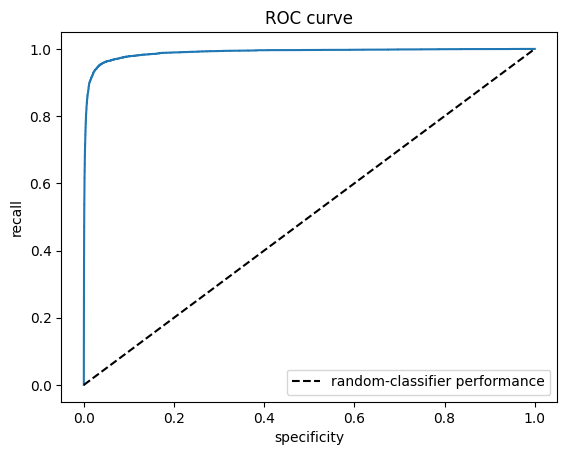

In [28]:
# a good classifier's ROC curve towards the top-left corner of the graph
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--', color = 'black', label= 'random-classifier performance')
plt.legend()
plt.ylabel('recall')
plt.xlabel('specificity')
plt.title('ROC curve')

In [29]:
# for a random classifier the probability of correctly predicting a positive (TPR) is the same as the probability of incorrectly predicting a positive 
# (FPR). Because both TPR and FPR increase at the same rate when you change the threshold, you end up with a situation where TPR equals FPR and hence
# the ROC curve of a random classifier has the form y= x

In [30]:
# One way to compare classifier performance is to compute the area under the curve AUC for ROC - AUC ROC
# A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(new_targets, decision_scores)

np.float64(0.9895613256249142)

In [32]:
# using randomforestclassifier to perform binary image classification
from sklearn.ensemble import RandomForestClassifier

In [33]:
# RandomForestClassifier class does not have a decision_function() method, due to the way it works

# random_state controls both the randomness of the bootstrapping of the samples used and the sampling of the 
# features to consider when looking for the best split at each node
random_forest_clf = RandomForestClassifier(random_state = 45)

In [35]:
from sklearn.model_selection import cross_val_predict

In [45]:
forest_scores = cross_val_predict(random_forest_clf, X_train, new_targets, cv = 3, method= 'predict_proba')

In [39]:
forest_scores.shape

(60000, 2)

In [46]:
forest_scores = forest_scores[:,1]

In [47]:
f_precisions, f_recalls, f_thresholds= precision_recall_curve(new_targets, forest_scores)

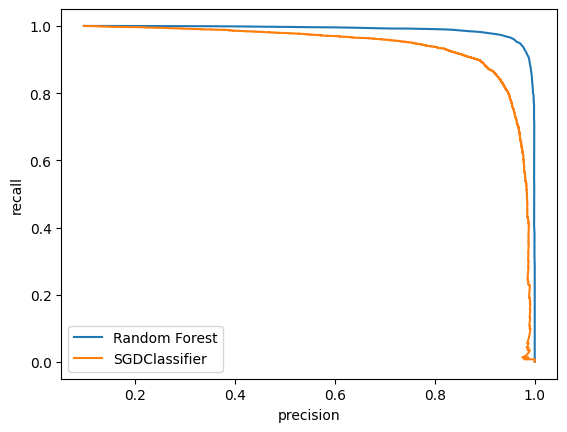

In [56]:
plt.plot(f_precisions, f_recalls, label = 'Random Forest')
plt.plot(precisions, recalls, label = 'SGDClassifier')
plt.legend()
plt.xlabel("precision")
plt.ylabel('recall')
plt.show()

In [57]:
roc_auc_score(new_targets, forest_scores)

np.float64(0.9984028861677359)